In [162]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')

import re  #regular expression operations, used here to clean unwanted characters.
import nltk #Natural Language Toolkit, a library for text processing.
from nltk.corpus import stopwords #Common English words (like "the", "is", "and") that are often removed in NLP.
from nltk.stem import WordNetLemmatizer #A tool to reduce words to their base (dictionary) form (e.g., "running" → "run").
# Downloads the English stopword list and WordNet lemmatization dictionary 
nltk.download('stopwords')
nltk.download('wordnet')
#Initialize Stopwords and Lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

from io import BytesIO
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud

import re
from nltk.stem.porter import PorterStemmer
from wordcloud import STOPWORDS
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [163]:
#Load the Data
df = pd.read_csv(r"C:\Users\Python Class\AI_Echo_Project5\chatgpt_reviews - chatgpt_reviews.csv")
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,Mother former community upon vote fact. Sure stock rich could soldier PM wear.,2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,General paper understand main. Or age half wonder positive senior. Book agency professional over alone away sit.\nAfter like law policy than what news. Book moment hour approach kind future ten.,5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,Here situation his high stage. Agree certainly blue thousand sense.\nHelp remember media over as country. Rich box increase place better energy tough nation. Care think huge game value.,4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,Rule court behind growth reality. Tonight whose car assume school national. Matter heart television yourself.\nMorning source east simple about woman. Put enough consider candidate imagine show.,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,Case opportunity season road write. Effort green worry tonight similar.\nWife last probably light think war. Safe claim whose check.,3,cnorton,71,131,Web,hi,Australia,4.1,No


Data PreProcessing

In [164]:
df.shape

(10000, 12)

In [165]:
#column names
print(f"feature names : {df.columns.values}")

feature names : ['date' 'title' 'review' 'rating' 'username' 'helpful_votes'
 'review_length' 'platform' 'language' 'location' 'version'
 'verified_purchase']


In [166]:
#Handling missing values
df.isnull().sum()

date                 0
title                0
review               0
rating               0
username             0
helpful_votes        0
review_length        0
platform             0
language             0
location             0
version              0
verified_purchase    0
dtype: int64

In [167]:
import re  #regular expression operations, used here to clean unwanted characters.
import nltk #Natural Language Toolkit, a library for text processing.
from nltk.corpus import stopwords #Common English words (like "the", "is", "and") that are often removed in NLP.
from nltk.stem import WordNetLemmatizer #A tool to reduce words to their base (dictionary) form (e.g., "running" → "run").

# Downloads the English stopword list and WordNet lemmatization dictionary 
nltk.download('stopwords')
nltk.download('wordnet')

#Initialize Stopwords and Lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean text
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize remove stopwords,lemmitize
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words).strip()

# Ensure no NaN in the review column
df['review'] = df['review'].fillna('')

# Apply the function to the 'review' column
df['cleaned_review'] = df['review'].apply(preprocess_text)

pd.set_option('display.max_colwidth', None) #maximise column
# Show the original and cleaned reviews
df[['review', 'cleaned_review']].head()

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


,review,cleaned_review
0,Mother former community upon vote fact. Sure stock rich could soldier PM wear.,mother former community upon vote fact sure stock rich could soldier pm wear
1,General paper understand main. Or age half wonder positive senior. Book agency professional over alone away sit.\nAfter like law policy than what news. Book moment hour approach kind future ten.,general paper understand main age half wonder positive senior book agency professional alone away sit like law policy news book moment hour approach kind future ten
2,Here situation his high stage. Agree certainly blue thousand sense.\nHelp remember media over as country. Rich box increase place better energy tough nation. Care think huge game value.,situation high stage agree certainly blue thousand sense help remember medium country rich box increase place better energy tough nation care think huge game value
3,Rule court behind growth reality. Tonight whose car assume school national. Matter heart television yourself.\nMorning source east simple about woman. Put enough consider candidate imagine show.,rule court behind growth reality tonight whose car assume school national matter heart television morning source east simple woman put enough consider candidate imagine show
4,Case opportunity season road write. Effort green worry tonight similar.\nWife last probably light think war. Safe claim whose check.,case opportunity season road write effort green worry tonight similar wife last probably light think war safe claim whose check


In [168]:
#Analysing rating column
print(f"Rating value count: \n{df['rating'].value_counts()}")

Rating value count: 
rating
1    2062
5    2013
2    2007
4    1975
3    1943
Name: count, dtype: int64


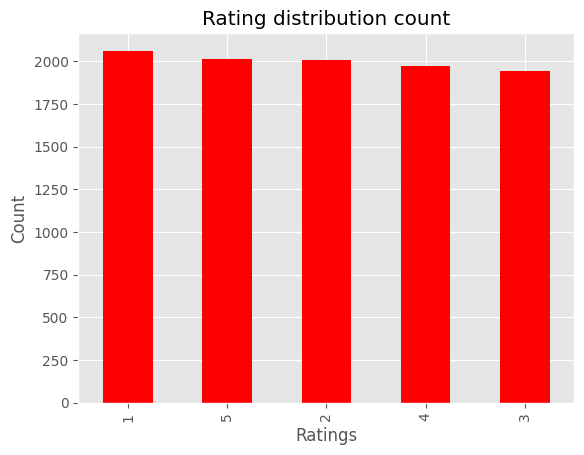

In [169]:
#Bar plot to visualise the total counts of each rating

df['rating'].value_counts().plot.bar(color='red')
plt.title("Rating distribution count")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

In [170]:
#finding percentage distribution of each rating

print(f"Rating value count - percentage distribution: \n{round(df['rating'].value_counts()/df.shape[0]*100,2)}")

Rating value count - percentage distribution: 
rating
1    20.62
5    20.13
2    20.07
4    19.75
3    19.43
Name: count, dtype: float64


0

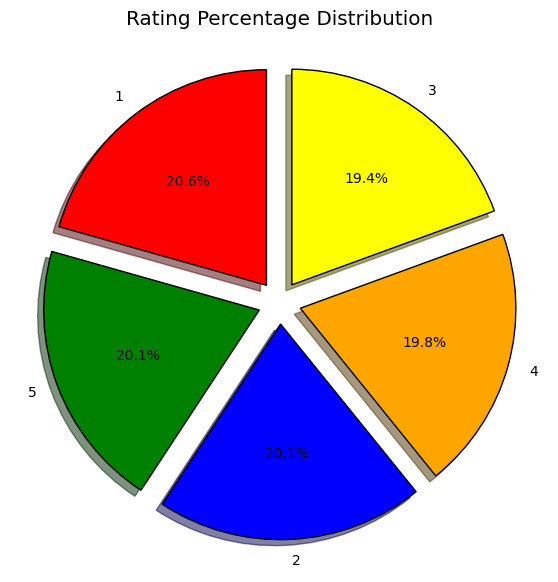

In [171]:
#plot above values in pie chart
import matplotlib.pyplot as plt
from io import BytesIO

# Prepare the pie data
tags = df['rating'].value_counts(normalize=True)
colors = ('red', 'green', 'blue', 'orange', 'yellow')
explode = [0.1] * len(tags)  # Dynamically explode all slices
wp = {'linewidth': 1, "edgecolor": 'black'}

# Plot
fig = plt.figure(figsize=(7, 7))
tags.plot(
    kind='pie',
    autopct="%1.1f%%",
    shadow=True,
    colors=colors[:len(tags)],
    startangle=90,
    explode=explode,
    wedgeprops=wp
)
plt.title("Rating Percentage Distribution")
plt.ylabel("")  # Optional: removes default ylabel

# Save to in-memory buffer
graph = BytesIO()
fig.savefig(graph, format="png")
graph.seek(0)  # Reset buffer position (important for reading later)

Analysing verified_purchase column

In [172]:
#Distinct values and its count 
print(f"verified_purchase count : \n{df['verified_purchase'].value_counts()}")

verified_purchase count : 
verified_purchase
No     5116
Yes    4884
Name: count, dtype: int64


In [173]:
#Extracting review value for one record with verified_purchase = yes
review_yes = df[df['verified_purchase'] == 'Yes'].iloc[0]['review']
print(review_yes)

General paper understand main. Or age half wonder positive senior. Book agency professional over alone away sit.
After like law policy than what news. Book moment hour approach kind future ten.


In [174]:
#Extracting review value for one record with verified_purchase = yes
review_no = df[df['verified_purchase'] == 'No'].iloc[0]['review']
print(review_no)

Mother former community upon vote fact. Sure stock rich could soldier PM wear.


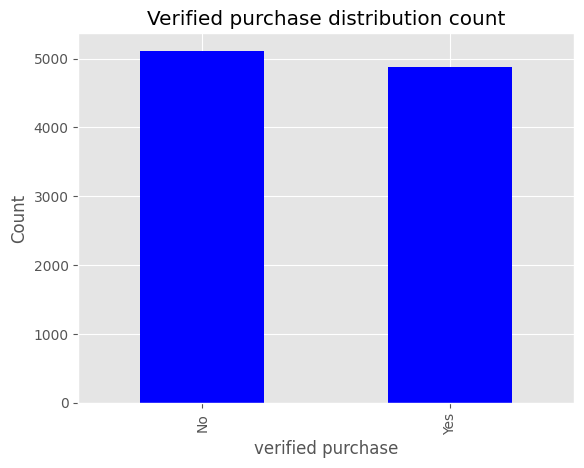

In [175]:
#Bar graph to visualize total counts of each feedback

df['verified_purchase'].value_counts().plot.bar(color='blue')
plt.title("Verified purchase distribution count")
plt.xlabel('verified purchase')
plt.ylabel('Count')
plt.show()

Classifying Postive , Negative , Neutral Reviews

In [176]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = sid.polarity_scores(str(text))
    compound = score['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['feedback_sentiment'] = df['review'].apply(vader_sentiment)

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [177]:
#Distinct values of review and its counts
print(f"Feedback value count: \n{df['feedback_sentiment'].value_counts()}")


Feedback value count: 
feedback_sentiment
Positive    7065
Negative    1949
Neutral      986
Name: count, dtype: int64


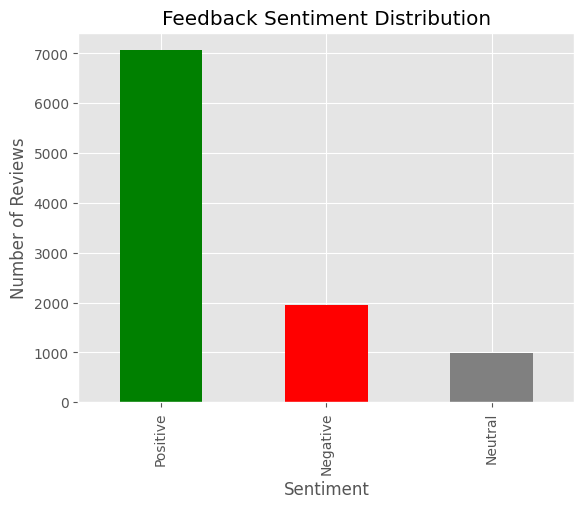

In [178]:
import matplotlib.pyplot as plt

df['feedback_sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Feedback Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

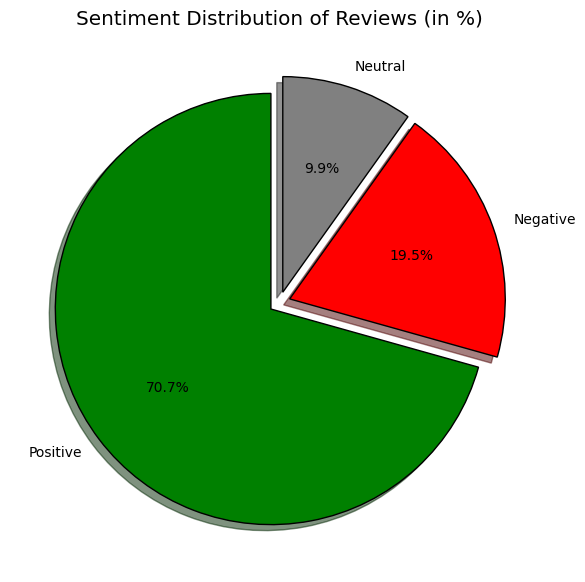

In [179]:
import matplotlib.pyplot as plt

# Step 1: Value counts (with normalization gives percentage)
sentiment_counts = df['feedback_sentiment'].value_counts(normalize=True) * 100

# Step 2: Plot as pie chart
colors = ['green', 'red', 'gray']  # Positive, Negative, Neutral
explode = [0.05] * len(sentiment_counts)  # Slightly explode all slices
wp = {'linewidth': 1, "edgecolor": 'black'}

# Step 3: Plot
plt.figure(figsize=(7, 7))
sentiment_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(sentiment_counts)],
    explode=explode,
    wedgeprops=wp,
    shadow=True
)
plt.title("Sentiment Distribution of Reviews (in %)")
plt.ylabel("")  # Hide y-label
plt.show()

Length Analysis of the review

In [180]:
print(df['review_length'].describe())

count    10000.000000
mean       147.034000
std         34.911708
min         30.000000
25%        122.000000
50%        151.000000
75%        176.000000
max        199.000000
Name: review_length, dtype: float64


In [181]:
def get_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['rating'].apply(get_sentiment)

In [182]:
df['review_length'] = df['review'].astype(str).apply(lambda x: len(x.split()))

C:\Users\nithu\AppData\Local\Temp\ipykernel_27328\482473078.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_length', data=df, palette='Set2')


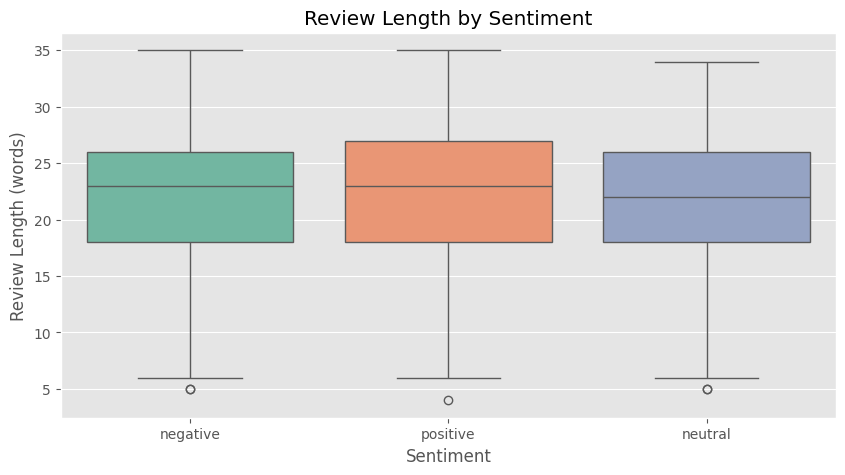

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x='sentiment', y='review_length', data=df, palette='Set2')
plt.title("Review Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (words)")
plt.show()

C:\Users\nithu\AppData\Local\Temp\ipykernel_27328\3715423066.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sentiment', y='review_length', data=df, palette='Set3')


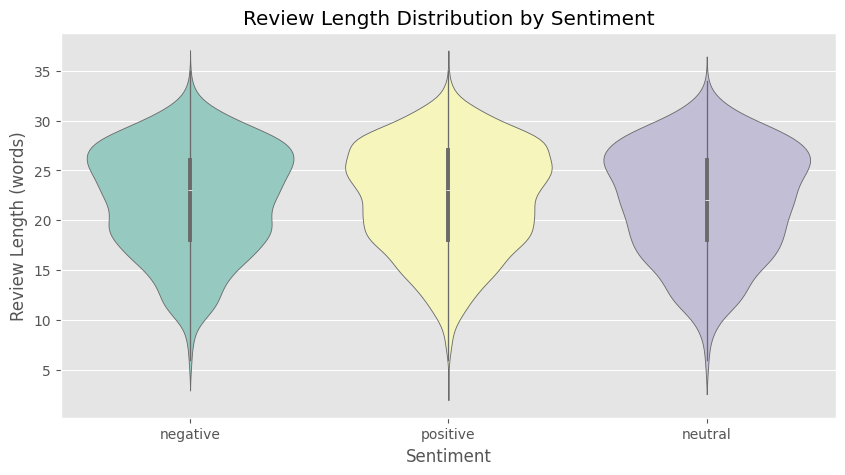

In [184]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='sentiment', y='review_length', data=df, palette='Set3')
plt.title("Review Length Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length (words)")
plt.show()


In [185]:
print(df.groupby('sentiment')['review_length'].describe())

            count       mean       std  min   25%   50%   75%   max
sentiment                                                          
negative   4069.0  22.091423  5.400253  5.0  18.0  23.0  26.0  35.0
neutral    1943.0  21.845085  5.507806  5.0  18.0  22.0  26.0  34.0
positive   3988.0  22.240471  5.318036  4.0  18.0  23.0  27.0  35.0


Lengthwise mean ratings

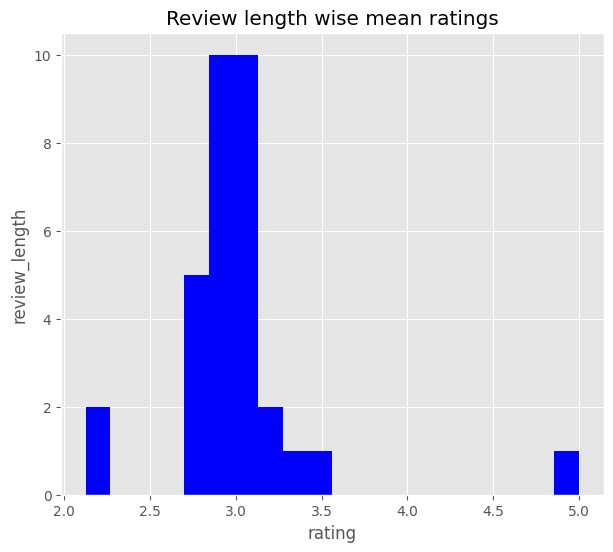

In [186]:
df.groupby('review_length')['rating'].mean().plot.hist(color = 'blue', figsize=(7,6), bins = 20)
plt.title("Review length wise mean ratings")
plt.xlabel('rating')
plt.ylabel("review_length")
plt.show()

In [187]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(df.review)

In [188]:
!pip install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


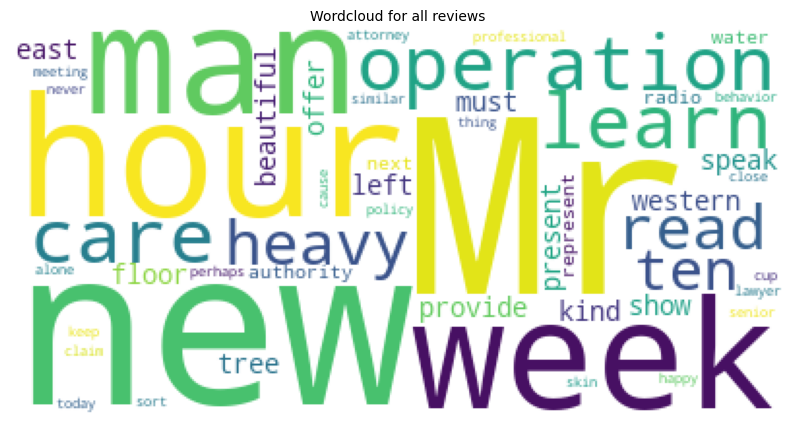

In [189]:
from wordcloud import WordCloud
#combine all reviews
reviews = " ".join([review for review in df['review']])

#initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

#Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title("Wordcloud for all reviews", fontsize=10)
plt.axis("off")
plt.show()

Preprocessing and Modelling

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack, csr_matrix
import numpy as np

# Map target
df['verified_purchase'] = df['verified_purchase'].map({'No': 0, 'Yes': 1})

# Add metadata
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))
df['char_length'] = df['review'].apply(lambda x: len(str(x)))

# Train-test split on full dataframe to preserve row alignment
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=3000, stop_words='english', ngram_range=(1, 2))
X_tfidf_train = tfidf.fit_transform(train_df['review'])
X_tfidf_test = tfidf.transform(test_df['review'])

# Metadata scaling
scaler = MinMaxScaler()
X_meta_train = scaler.fit_transform(train_df[['review_length']])
X_meta_test = scaler.transform(test_df[['review_length']])

# Convert to sparse matrix
X_meta_train_sparse = csr_matrix(X_meta_train)
X_meta_test_sparse = csr_matrix(X_meta_test)

# Combine TF-IDF + metadata
X_train_combined = hstack([X_tfidf_train, X_meta_train_sparse])
X_test_combined = hstack([X_tfidf_test, X_meta_test_sparse])

# Target
y_train = train_df['verified_purchase']
y_test = test_df['verified_purchase']


Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1541
           1       0.47      0.45      0.46      1459

    accuracy                           0.49      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.49      0.49      0.49      3000



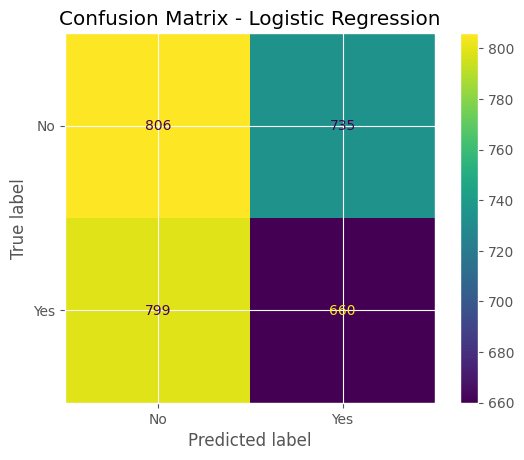

ROC AUC Score: 0.4865021378194109


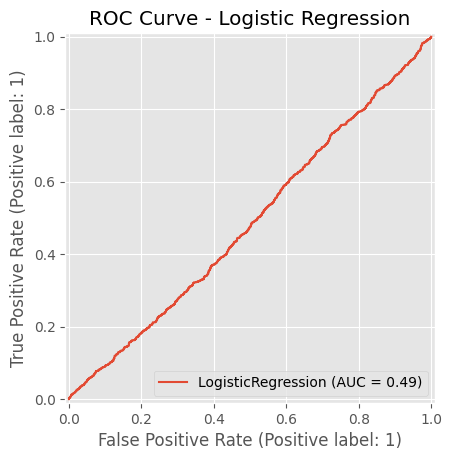


Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.50      0.51      1541
           1       0.48      0.49      0.48      1459

    accuracy                           0.49      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.49      0.49      0.49      3000



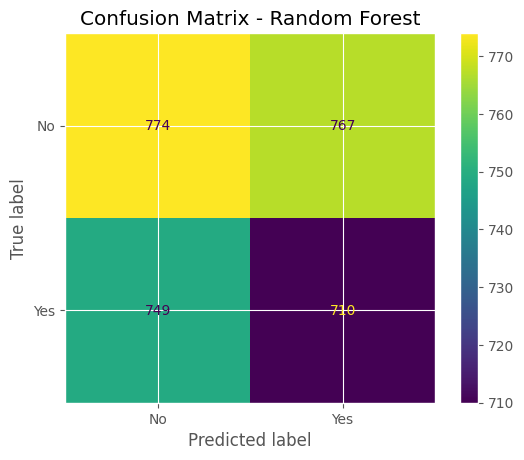

ROC AUC Score: 0.4969079120889873


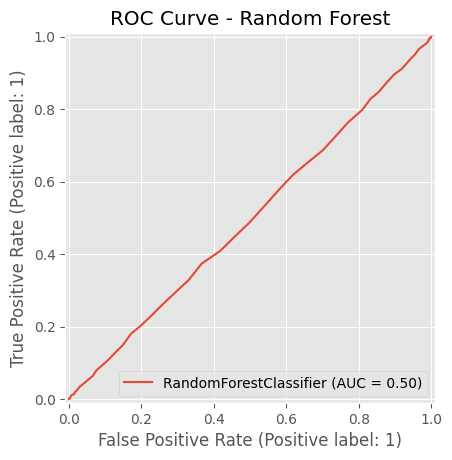


Naive Bayes
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.62      0.56      1541
           1       0.47      0.35      0.40      1459

    accuracy                           0.49      3000
   macro avg       0.49      0.49      0.48      3000
weighted avg       0.49      0.49      0.48      3000



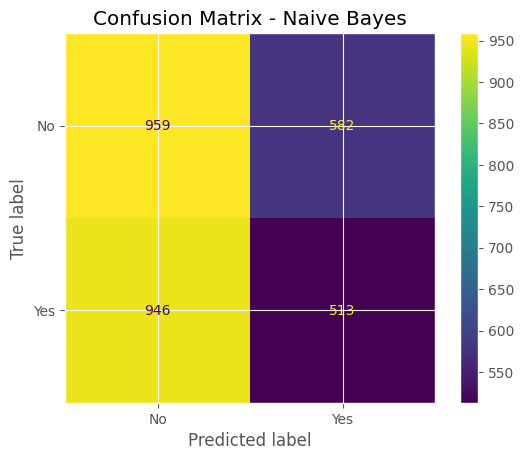

ROC AUC Score: 0.4913212938199607


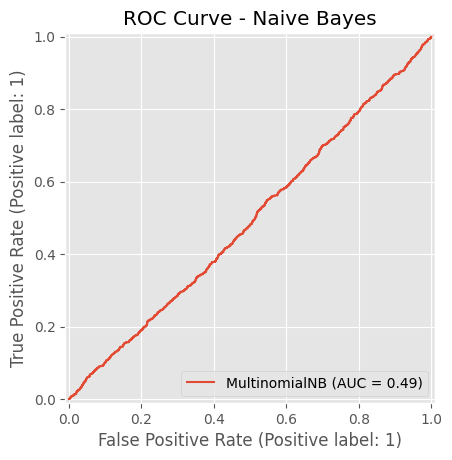

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay
)
import matplotlib.pyplot as plt

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayes": MultinomialNB()
}

# Evaluate each model
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train_combined, y_train)
    y_pred = model.predict(X_test_combined)
    y_proba = model.predict_proba(X_test_combined)[:, 1]

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # ROC AUC Score and Curve
    auc_score = roc_auc_score(y_test, y_proba)
    print("ROC AUC Score:", auc_score)
    RocCurveDisplay.from_estimator(model, X_test_combined, y_test)
    plt.title(f"ROC Curve - {name}")
    plt.show()


In [192]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [193]:
# Drop NaNs from target and align features accordingly
mask = y_train.notna()
X_train_combined = X_train_combined[mask]
y_train = y_train[mask]

AttributeError: 'Series' object has no attribute 'nonzero'

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# First, split raw features and target
X_text = df['review']
y = df['verified_purchase'].map({'No': 0, 'Yes': 1})

# Train-test split
X_text_train, X_text_test, y_train, y_test = train_test_split(X_text, y, test_size=0.3, random_state=42)

# TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000, stop_words='english', ngram_range=(1, 2))
X_tfidf_train = tfidf.fit_transform(X_text_train)
X_tfidf_test = tfidf.transform(X_text_test)

# Add metadata (e.g., review_length)
from scipy.sparse import hstack, csr_matrix
X_meta_train = csr_matrix(df.loc[X_text_train.index, ['review_length']].values)
X_meta_test = csr_matrix(df.loc[X_text_test.index, ['review_length']].values)

X_train_combined = hstack([X_tfidf_train, X_meta_train])
X_test_combined = hstack([X_tfidf_test, X_meta_test])

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

# Check new class distribution
from collections import Counter
print("After SMOTE:", Counter(y_train_balanced))


c:\Users\nithu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:399: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y contains NaN.